In [271]:
import torch
import matplotlib.pyplot as plt

In [272]:
weight=.6
bias=.4


start=0
end =1
step = 0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias
X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4120],
         [0.4240],
         [0.4360],
         [0.4480],
         [0.4600],
         [0.4720],
         [0.4840],
         [0.4960],
         [0.5080]]),
 50,
 50)

In [273]:
train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]  
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [274]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
    """Plots training data, test data and predictions if provided."""
    plt.figure(figsize=(10,6))
    plt.scatter(train_data, train_labels, c="black", s=6, label="Train data")
    plt.scatter(test_data, test_labels, c="g", s=6, label="Test data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=6, label="Predictions")

    plt.legend(prop={"size":15})
    

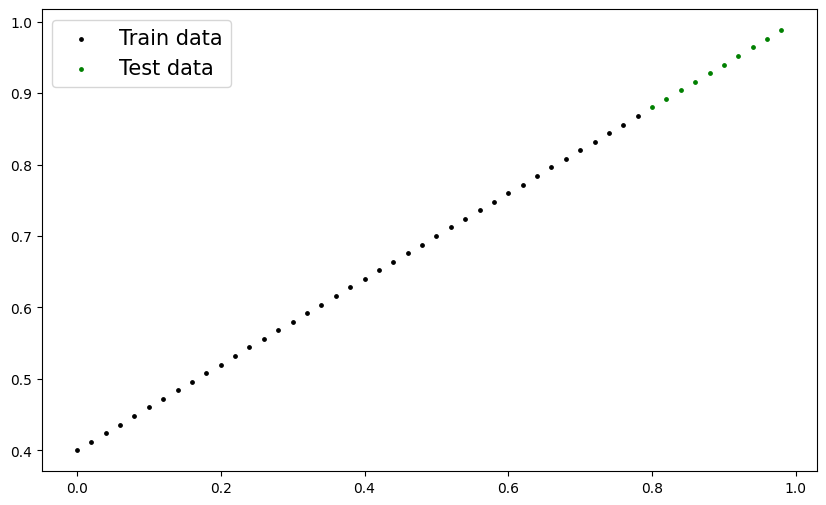

In [275]:
plot_predictions()

In [276]:
from torch import nn
class linearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.rand(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        self.bias=nn.Parameter(torch.rand(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    
    def forward(self,X:torch.Tensor)->torch.Tensor:
        return self.weights*X+self.bias

In [277]:
torch.manual_seed(42)
modelone=linearModel()

modelone.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [278]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8800],
         [0.8920],
         [0.9040],
         [0.9160],
         [0.9280],
         [0.9400],
         [0.9520],
         [0.9640],
         [0.9760],
         [0.9880]]))

In [279]:
with torch.inference_mode():
    y_pred=modelone(X_test)
y_pred

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [280]:
def plotPred():
    plt.scatter(X_test,y_pred)

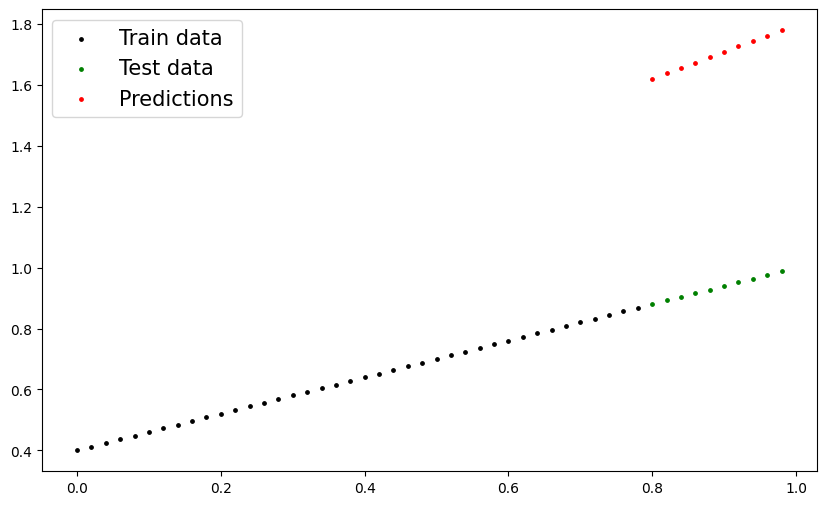

In [281]:
plot_predictions(predictions=y_pred)

In [284]:
modelone.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])